This notebook show the model evaludation results of the models using Morgan2 fingerprint__
Use the my-rdkit-env environment

In [1]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors, MACCSkeys
from rdkit.ML.Descriptors import MoleculeDescriptors
import sys
sys.path.append("/home/mylab-pharma/Code/tuele/XO/src/common")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pharmacy_common import PharmacyCommon

common = PharmacyCommon()

READ THE DATA

In [2]:
train_test_path = "../../data/train_test_data/XO_train_test_data.xlsx"
train_dataset = pd.read_excel(train_test_path, sheet_name='train_dataset')
train_dataset = pd.read_excel(train_test_path, sheet_name='train_dataset')
test_dataset = pd.read_excel(train_test_path, sheet_name='test_dataset')
validation_dataset = pd.read_excel(train_test_path, sheet_name='validation_dataset')

all_screening_data_path_ecfp4 = "../../results/average_distance/20240422_avg_distance_ecfp4.xlsx"
all_screening_data_path_maccs = "../../results/average_distance/20240422_avg_distance_maccs.xlsx"
all_screening_dataset_ecfp4 = pd.read_excel(all_screening_data_path_ecfp4)
all_screening_dataset_maccs = pd.read_excel(all_screening_data_path_maccs)
print(len(all_screening_dataset_ecfp4), len(all_screening_dataset_maccs))


406925 406925


In [3]:
all_screening_dataset_ecfp4.head()

,SMILES,AVG_DISTANCE
0,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,0.217379
1,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,0.260064
2,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,0.261712
3,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,0.196421
4,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,0.250615


In [4]:
avg_distance_ecfp4 = all_screening_dataset_ecfp4["AVG_DISTANCE"]
avg_distance_maccs = all_screening_dataset_maccs["AVG_DISTANCE"]
print(len(avg_distance_ecfp4),len(avg_distance_maccs))

406925 406925


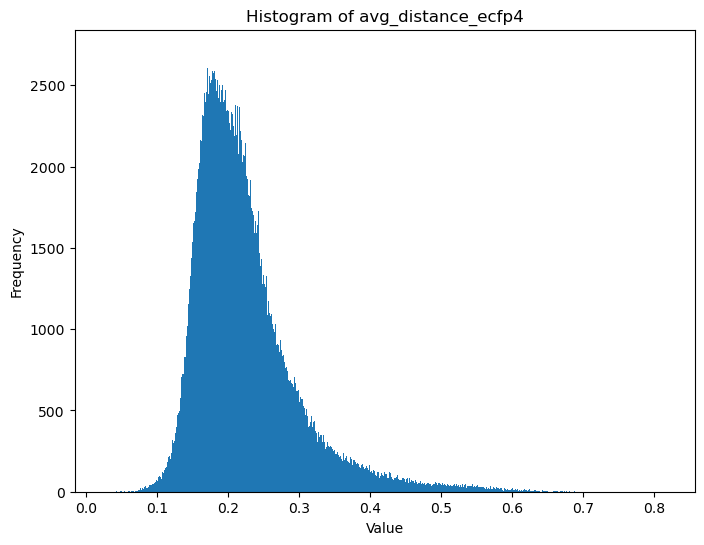

In [5]:
avg_distance = np.array(avg_distance_ecfp4)

plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(avg_distance, bins=1000)  # Create the histogram with 20 bins
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of avg_distance_ecfp4')

# Show the plot
plt.show()  

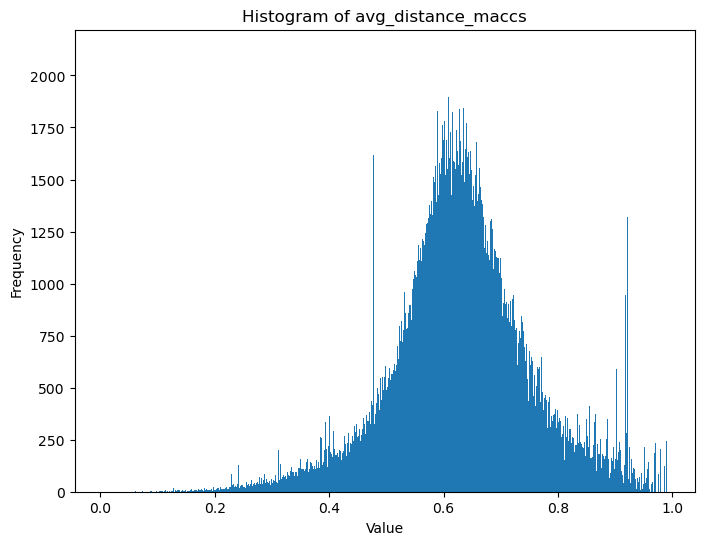

In [6]:
avg_distance = np.array(avg_distance_maccs)

plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(avg_distance, bins=1000)  # Create the histogram with 20 bins
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of avg_distance_maccs')

# Show the plot
plt.show()  

In [7]:
threshold = 0.5
screen_dataset_ecfp4 = all_screening_dataset_ecfp4[all_screening_dataset_ecfp4["AVG_DISTANCE"]>threshold]
# không quan tâm MACCS
screen_dataset_maccs = all_screening_dataset_maccs[all_screening_dataset_maccs["AVG_DISTANCE"]>threshold]
print(len(screen_dataset_ecfp4),len(screen_dataset_maccs))

4455 357539


In [8]:
print(len(train_dataset))
train_dataset.head()

337


,CID,SMILES,IC50(nM),Type,substructure
0,145967694,CC1=CC2=C(C=C1)N=C(O2)/C(=N/O)/CC3=CC=CC=C3,17500.0,active,7
1,76329670,CC1(C=CC2=CC(=C(C=C2O1)O)C(=O)/C=C/C3=CC(=C(C=...,1800.0,inactive,16
2,5320686,C1=CC(=CC=C1/C=C/C(=O)OC[C@@H]2[C@H]([C@@H]([C...,100000.0,active,6
3,155903284,C1=CC(=CC=C1C2=NC=NN2)NC(=O)C3C(NC(=O)NC3=O)O,1400.0,inactive,1
4,137648214,CCCCC1=NN2C(=N1)C3=C(NC2=O)NN=C3,529.0,inactive,9


In [9]:
screen_dataset_ecfp4.head()

,SMILES,AVG_DISTANCE
1930,O=C1C=C(OC2=C1C(O)=C(C(O)=C2C3OCC(O)C(O)C3O)C4...,0.520376
1936,O=C(OC1OCC(O)C(OC2OC(CO)C(O)C(O)C2O)C1O)C34CCC...,0.505201
1955,O=C(OC1C(OC(OC=2C(=O)C=3C(O)=CC(O)=CC3OC2C=4C=...,0.520915
1960,O=C1C(OC2OC(CO)C(O)C(O)C2OC3OC(CO)C(O)C(O)C3OC...,0.634223
2063,O=C1C(OC)=C(OC2=CC(OC3OC(CO)C(OC4OC(CO)C(O)C(O...,0.551688


In [10]:
screen_dataset_maccs.head(10)

,SMILES,AVG_DISTANCE
0,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,0.575586
1,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,0.695284
2,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,0.695284
3,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,0.657312
4,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,0.700441
5,O=C1OC(C)C(O)C12C(O)C(O)CCC2C,0.652018
6,O=C1OC2C(OC(=O)C)C=CC3C4=C5C(=O)C=6C(OC(=O)C)=...,0.697876
7,O=C(OCCC1(C)CC(OC(=O)C)C(OC(=O)C)C2CC(C)(C)CC21)C,0.663761
8,O=CCC1(C)CC(=O)C(O)C2CC(C)(C)CC21,0.610955
9,O=C1C=2C=CC=C(OC)C2C(=O)C3=C(OC)C=C4C(=C13)C5C...,0.700109


Encoding labels and fingerprints

In [11]:
X_Screening_ECFP4 = common.gen_ecfp4_fpts(screen_dataset_ecfp4["SMILES"],1024)
# X_Screening_MACCS = common.gen_maccs_fpts(screen_dataset_maccs["SMILES"])
X_Screening_MACCS = common.gen_maccs_fpts(screen_dataset_ecfp4["SMILES"])

Progress:   0%|          | 0/4455 [00:00<?, ?it/s]

[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerator
[00:17:59] DEPRECATION WARNING: please use MorganGenerat

In [12]:
print(len(X_Screening_ECFP4),len(X_Screening_MACCS))

4455 4455


In [13]:
X_Screening_ECFP4

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
#y data
y_Train = np.array(train_dataset['Type'])
y_Test = np.array(test_dataset['Type'])
y_Validation = np.array(validation_dataset['Type'])

#Original data
print(y_Train[0:5])
print(y_Test[0:5])
print(y_Validation[0:5])

#One-hot encoder
import sklearn.preprocessing as preprocessing
label_encoder = preprocessing.LabelEncoder()
y_Train = label_encoder.fit_transform(y_Train)
y_Test = label_encoder.fit_transform(y_Test)
y_Validation = label_encoder.fit_transform(y_Validation)
print(y_Train[0:5])
print(y_Test[0:5])
print(y_Validation[0:5])

['active' 'inactive' 'active' 'inactive' 'inactive']
['inactive' 'inactive' 'active' 'active' 'inactive']
['active' 'inactive' 'active' 'active' 'active']
[0 1 0 1 1]
[1 1 0 0 1]
[0 1 0 0 0]


MODELS LOAD

In [15]:
import xgboost as xgb
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

# RF – ECFP4 
rf_ecfp4 = load("../../results/models/rf_ECFP4.joblib")

# SVM – ECFP4 
svm_ecfp4 = load("../../results/models/svm_ECFP4.joblib")

# XGBoosting – ECFP4 
bst_ecfp4 = XGBClassifier()
bst_ecfp4.load_model("../../results/models/xgb_ECFP4.json")

# XGBoosting – MACCS 
bst_maccs = XGBClassifier()
bst_maccs.load_model("../../results/models/xgb_MACCS.json")

Predicting on the screening_dataset

In [16]:
def screening_dataset_predict(model, model_name, X_screening, label_encoder, screening_dataset):
    screening_dataset_predict = pd.DataFrame()
    screening_dataset_predict = screening_dataset.copy()
    # Prediction
    y_pred = model.predict(X_screening)
    y_pred_proba = model.predict_proba(X_screening)

    # Prepare data
    y_pred = label_encoder.inverse_transform(y_pred)
    screening_dataset_predict.loc[:, 'Prediction'] = y_pred
    screening_dataset_predict.loc[:, 'Probality for Active'] = y_pred_proba[:, 0]
    screening_dataset_predict.loc[:, 'Probality for Inactive'] = y_pred_proba[:, 1]
    screening_dataset_predict.loc[:, 'Model name'] = model_name

    return screening_dataset_predict

In [17]:
X_Screening_ECFP4.shape

(4455, 1024)

In [18]:
screen_dataset_ecfp4

,SMILES,AVG_DISTANCE
1930,O=C1C=C(OC2=C1C(O)=C(C(O)=C2C3OCC(O)C(O)C3O)C4...,0.520376
1936,O=C(OC1OCC(O)C(OC2OC(CO)C(O)C(O)C2O)C1O)C34CCC...,0.505201
1955,O=C(OC1C(OC(OC=2C(=O)C=3C(O)=CC(O)=CC3OC2C=4C=...,0.520915
1960,O=C1C(OC2OC(CO)C(O)C(O)C2OC3OC(CO)C(O)C(O)C3OC...,0.634223
2063,O=C1C(OC)=C(OC2=CC(OC3OC(CO)C(OC4OC(CO)C(O)C(O...,0.551688
...,...,...
402280,O=C1C(OC2OC(COC3OC(C)C(O)C(O)C3O)C(O)C(O)C2OC4...,0.529617
402969,O=C1C(O)=C(OC2=CC(O)=CC(OC3OC(COC4OC(C)C(O)C(O...,0.544192
404242,O=C(OC1OC(COC2OC(CO)C(OC3OC(C)C(O)C(O)C3O)C(O)...,0.605812
406067,O=C1C(OC2OC(COC3OC(C)C(O)C(O)C3O)C(O)C(O)C2O)=...,0.545531


In [19]:
screen_dataset_ecfp4.head(10)

,SMILES,AVG_DISTANCE
1930,O=C1C=C(OC2=C1C(O)=C(C(O)=C2C3OCC(O)C(O)C3O)C4...,0.520376
1936,O=C(OC1OCC(O)C(OC2OC(CO)C(O)C(O)C2O)C1O)C34CCC...,0.505201
1955,O=C(OC1C(OC(OC=2C(=O)C=3C(O)=CC(O)=CC3OC2C=4C=...,0.520915
1960,O=C1C(OC2OC(CO)C(O)C(O)C2OC3OC(CO)C(O)C(O)C3OC...,0.634223
2063,O=C1C(OC)=C(OC2=CC(OC3OC(CO)C(OC4OC(CO)C(O)C(O...,0.551688
2073,O=C1C(OC2OC(COC3OC(C)C(O)C(OC4OC(C)C(O)C(O)C4O...,0.588061
2149,O=C(OC1C(O)C(O)C(OC1OC=2C(=O)C3=C(O)C=C(OC4OC(...,0.534839
2172,O=C(O)C1OC(OC2C(O)C(OC(OC3C(O)C(O)C(OC3OC4=CC(...,0.532852
2272,O=C(OC1C(O)C(O)C(OC1C=2C(OC3OC(CO)C(O)C(O)C3O)...,0.559333
2273,O=C(O)C1OC(OC2=CC(O)=C3C(=O)C=C(OC3=C2)C=4C=C(...,0.505189


In [20]:
rf_ecfp4_prediction = screening_dataset_predict(model=rf_ecfp4, model_name="RF_ECFP4", X_screening=X_Screening_ECFP4, label_encoder=label_encoder, screening_dataset=screen_dataset_ecfp4)
svm_ecfp4_prediction = screening_dataset_predict(model=svm_ecfp4, model_name="SVM_ECFP4", X_screening=X_Screening_ECFP4, label_encoder=label_encoder, screening_dataset=screen_dataset_ecfp4)
bst_ecfp4_prediction = screening_dataset_predict(model=bst_ecfp4, model_name="XGBoosting_ECFP4", X_screening=X_Screening_ECFP4, label_encoder=label_encoder, screening_dataset=screen_dataset_ecfp4)
bst_maccs_prediction = screening_dataset_predict(model=bst_maccs, model_name="XGBoosting_MACCS", X_screening=X_Screening_MACCS, label_encoder=label_encoder, screening_dataset=screen_dataset_ecfp4)

In [21]:
# print(rf_ecfp4_2048_prediction.shape, rf_ecfp6_2048_prediction.shape, rf_ecfp4_1024_prediction.shape)
print(rf_ecfp4_prediction.shape, svm_ecfp4_prediction.shape, bst_ecfp4_prediction.shape, bst_maccs_prediction.shape)

(4455, 6) (4455, 6) (4455, 6) (4455, 6)


In [22]:
output_path = "/home/mylab-pharma/Code/tuele/XO/results/screening_results/20240530_screening_prediction_results.xlsx"
with pd.ExcelWriter(output_path) as writer:
    screen_dataset_ecfp4.to_excel(writer, sheet_name="Original data", index=False)
    rf_ecfp4_prediction.to_excel(writer, sheet_name="RF-ECFP4", index=False)
    svm_ecfp4_prediction.to_excel(writer, sheet_name="SVM-ECFP4", index=False)
    bst_ecfp4_prediction.to_excel(writer, sheet_name="XGB-ECFP4", index=False)
    bst_maccs_prediction.to_excel(writer, sheet_name="XGB-MACCS", index=False)

In [23]:
rf_ecfp4_prediction

,SMILES,AVG_DISTANCE,Prediction,Probality for Active,Probality for Inactive,Model name
1930,O=C1C=C(OC2=C1C(O)=C(C(O)=C2C3OCC(O)C(O)C3O)C4...,0.520376,active,0.943333,0.056667,RF_ECFP4
1936,O=C(OC1OCC(O)C(OC2OC(CO)C(O)C(O)C2O)C1O)C34CCC...,0.505201,active,0.880000,0.120000,RF_ECFP4
1955,O=C(OC1C(OC(OC=2C(=O)C=3C(O)=CC(O)=CC3OC2C=4C=...,0.520915,active,0.770000,0.230000,RF_ECFP4
1960,O=C1C(OC2OC(CO)C(O)C(O)C2OC3OC(CO)C(O)C(O)C3OC...,0.634223,active,0.966667,0.033333,RF_ECFP4
2063,O=C1C(OC)=C(OC2=CC(OC3OC(CO)C(OC4OC(CO)C(O)C(O...,0.551688,active,0.916667,0.083333,RF_ECFP4
...,...,...,...,...,...,...
402280,O=C1C(OC2OC(COC3OC(C)C(O)C(O)C3O)C(O)C(O)C2OC4...,0.529617,active,0.950000,0.050000,RF_ECFP4
402969,O=C1C(O)=C(OC2=CC(O)=CC(OC3OC(COC4OC(C)C(O)C(O...,0.544192,active,0.783333,0.216667,RF_ECFP4
404242,O=C(OC1OC(COC2OC(CO)C(OC3OC(C)C(O)C(O)C3O)C(O)...,0.605812,active,0.950000,0.050000,RF_ECFP4
406067,O=C1C(OC2OC(COC3OC(C)C(O)C(O)C3O)C(O)C(O)C2O)=...,0.545531,active,0.866667,0.133333,RF_ECFP4


In [24]:
rf_ecfp4_prediction

,SMILES,AVG_DISTANCE,Prediction,Probality for Active,Probality for Inactive,Model name
1930,O=C1C=C(OC2=C1C(O)=C(C(O)=C2C3OCC(O)C(O)C3O)C4...,0.520376,active,0.943333,0.056667,RF_ECFP4
1936,O=C(OC1OCC(O)C(OC2OC(CO)C(O)C(O)C2O)C1O)C34CCC...,0.505201,active,0.880000,0.120000,RF_ECFP4
1955,O=C(OC1C(OC(OC=2C(=O)C=3C(O)=CC(O)=CC3OC2C=4C=...,0.520915,active,0.770000,0.230000,RF_ECFP4
1960,O=C1C(OC2OC(CO)C(O)C(O)C2OC3OC(CO)C(O)C(O)C3OC...,0.634223,active,0.966667,0.033333,RF_ECFP4
2063,O=C1C(OC)=C(OC2=CC(OC3OC(CO)C(OC4OC(CO)C(O)C(O...,0.551688,active,0.916667,0.083333,RF_ECFP4
...,...,...,...,...,...,...
402280,O=C1C(OC2OC(COC3OC(C)C(O)C(O)C3O)C(O)C(O)C2OC4...,0.529617,active,0.950000,0.050000,RF_ECFP4
402969,O=C1C(O)=C(OC2=CC(O)=CC(OC3OC(COC4OC(C)C(O)C(O...,0.544192,active,0.783333,0.216667,RF_ECFP4
404242,O=C(OC1OC(COC2OC(CO)C(OC3OC(C)C(O)C(O)C3O)C(O)...,0.605812,active,0.950000,0.050000,RF_ECFP4
406067,O=C1C(OC2OC(COC3OC(C)C(O)C(O)C3O)C(O)C(O)C2O)=...,0.545531,active,0.866667,0.133333,RF_ECFP4


In [33]:
threshold_inactive = 0.9
rf_ecfp4_prediction_active = rf_ecfp4_prediction[rf_ecfp4_prediction["Probality for Inactive"] > threshold_inactive]
svm_ecfp4_prediction_active = svm_ecfp4_prediction[svm_ecfp4_prediction["Probality for Inactive"] > threshold_inactive]
bst_ecfp4_prediction_active = bst_ecfp4_prediction[bst_ecfp4_prediction["Probality for Inactive"] > threshold_inactive]
bst_maccs_prediction_active = bst_maccs_prediction[bst_maccs_prediction["Probality for Inactive"] > threshold_inactive]
print(len(rf_ecfp4_prediction_active), len(svm_ecfp4_prediction_active),
      len(bst_ecfp4_prediction_active), len(bst_maccs_prediction_active))


5 11 123 113


In [34]:
print(len(rf_ecfp4_prediction_active["SMILES"].unique()),
      len(svm_ecfp4_prediction_active["SMILES"].unique()),
      len(bst_ecfp4_prediction_active["SMILES"].unique()),
      len(bst_maccs_prediction_active["SMILES"].unique()))

5 11 123 113


In [35]:
#Voting models results
all_active_prediction = pd.concat([rf_ecfp4_prediction_active,svm_ecfp4_prediction_active,
                                bst_ecfp4_prediction_active, bst_maccs_prediction_active]
                                , axis =0)
len(all_active_prediction)

252

In [36]:
unique_smiles = all_active_prediction['SMILES'].unique()
len(unique_smiles)

189

In [37]:
unique_smiles = list(all_active_prediction['SMILES'].unique())
final_voting_result_tmp = pd.DataFrame({'SMILES': unique_smiles})
smile = unique_smiles[0]    
smile_df = all_active_prediction[all_active_prediction['SMILES'] == smile]
count = smile_df.shape[0]
print(smile_df.head(10), count)
final_voting_result_tmp.loc[:, 'Number of models voting active'] = count
proba = np.array(smile_df["Probality for Active"])
avg_rate = np.average(proba)
final_voting_result_tmp.loc[:, 'AVG probality for Active'] = avg_rate
print(avg_rate)


                                                 SMILES  AVG_DISTANCE  \
65085  O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=CC(O)=C(O)C3      0.795884   
65085  O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=CC(O)=C(O)C3      0.795884   
65085  O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=CC(O)=C(O)C3      0.795884   
65085  O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=CC(O)=C(O)C3      0.795884   

      Prediction  Probality for Active  Probality for Inactive  \
65085   inactive              0.060833                0.939167   
65085   inactive              0.040699                0.959301   
65085   inactive              0.002194                0.997806   
65085   inactive              0.028438                0.971562   

             Model name  
65085          RF_ECFP4  
65085         SVM_ECFP4  
65085  XGBoosting_ECFP4  
65085  XGBoosting_MACCS   4
0.03304121068884544


In [39]:
unique_smiles = list(all_active_prediction['SMILES'].unique())
final_voting_result= pd.DataFrame({'SMILES': unique_smiles})
for i, smile in enumerate(unique_smiles): 
    smile_df = all_active_prediction[all_active_prediction['SMILES'] == smile]
    count = smile_df.shape[0]
    final_voting_result.at[i, 'Models voting for Active'] = count
    dis = np.array(smile_df["AVG_DISTANCE"])
    avg_dis = np.average(dis)
    final_voting_result.at[i, "ALL_AVG_DISTANCE"] = avg_dis
    proba = np.array(smile_df["Probality for Active"])
    avg_rate = 1 - np.average(proba)
    final_voting_result.at[i, 'AVG probality for Active'] = avg_rate
final_voting_result.head(10)

,SMILES,Models voting for Active,ALL_AVG_DISTANCE,AVG probality for Active
0,O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=CC(O)=C(O)C3,4.0,0.795884,0.966959
1,O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=C(O)C(O)=C...,4.0,0.782432,0.944960
2,O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=CC=CC3,3.0,0.787489,0.956213
3,O=C1C=C(OC=2C=C(O)C=C(O)C12)C=3C=CC=CC3,3.0,0.704932,0.937306
4,N#CC=1C=C(C=CC1OCC(C)C)C2=NC(=C(S2)C(=O)O)C,4.0,0.614338,0.965586
5,O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=CC(O)=C(C3...,2.0,0.625166,0.950902
6,O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=CC(O)=C(C3...,2.0,0.626613,0.965761
7,O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=C(O)C=C(O)C3,2.0,0.758818,0.951228
8,O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=CC=C(O)C3,2.0,0.723408,0.961084
9,O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=CC(O)=C(C3...,3.0,0.754205,0.954039


In [42]:
final_voting_result[final_voting_result["Models voting for Active"]==4.0]

,SMILES,Models voting for Active,ALL_AVG_DISTANCE,AVG probality for Active
0,O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=CC(O)=C(O)C3,4.0,0.795884,0.966959
1,O=C1C(O)=C(OC=2C=C(O)C=C(O)C12)C=3C=C(O)C(O)=C...,4.0,0.782432,0.944960
4,N#CC=1C=C(C=CC1OCC(C)C)C2=NC(=C(S2)C(=O)O)C,4.0,0.614338,0.965586


Write to file

In [31]:
screen_dataset_ecfp4.head(10)

,SMILES,AVG_DISTANCE
1930,O=C1C=C(OC2=C1C(O)=C(C(O)=C2C3OCC(O)C(O)C3O)C4...,0.520376
1936,O=C(OC1OCC(O)C(OC2OC(CO)C(O)C(O)C2O)C1O)C34CCC...,0.505201
1955,O=C(OC1C(OC(OC=2C(=O)C=3C(O)=CC(O)=CC3OC2C=4C=...,0.520915
1960,O=C1C(OC2OC(CO)C(O)C(O)C2OC3OC(CO)C(O)C(O)C3OC...,0.634223
2063,O=C1C(OC)=C(OC2=CC(OC3OC(CO)C(OC4OC(CO)C(O)C(O...,0.551688
2073,O=C1C(OC2OC(COC3OC(C)C(O)C(OC4OC(C)C(O)C(O)C4O...,0.588061
2149,O=C(OC1C(O)C(O)C(OC1OC=2C(=O)C3=C(O)C=C(OC4OC(...,0.534839
2172,O=C(O)C1OC(OC2C(O)C(OC(OC3C(O)C(O)C(OC3OC4=CC(...,0.532852
2272,O=C(OC1C(O)C(O)C(OC1C=2C(OC3OC(CO)C(O)C(O)C3O)...,0.559333
2273,O=C(O)C1OC(OC2=CC(O)=C3C(=O)C=C(OC3=C2)C=4C=C(...,0.505189


In [32]:
with pd.ExcelWriter('../../results/screening_results/20240422_Screening_results.xlsx', engine='openpyxl') as writer:
    screen_dataset_ecfp4.to_excel(writer, sheet_name= "Screening data_ECFP4", index= False)
    # screen_dataset_maccs.to_excel(writer, sheet_name= "Screening data_MACCS", index= False)
    rf_ecfp4_prediction.to_excel(writer, sheet_name="RF_ECFP4", index=False)
    svm_ecfp4_prediction.to_excel(writer, sheet_name="SVM_ECFP4", index=False)
    bst_ecfp4_prediction.to_excel(writer, sheet_name="XGBoosting_ECFP4", index=False)
    bst_maccs_prediction.to_excel(writer, sheet_name="XGBoosting_MACCS", index=False)
    all_active_prediction.to_excel(writer, sheet_name="Active probality > 0.8", index= False)
    final_voting_result.to_excel(writer, sheet_name="Final voting result", index= False)